In [320]:
## Implementación de Algoritmos

import numpy as np
import time
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
sns.set_theme(style="darkgrid")
%matplotlib inline

In [305]:
# Insertion sort

def insertionSort(array):
    for i in range(1,len(array)):
        current = array[i]
        while i>0 and array[i-1]>current:
            array[i] = array[i-1]
            i = i-1
            array[i] = current
    return array

In [355]:
def mergeSort(array): 
     
    current_size = 1
     
    while current_size < len(array) - 1: 
         
        left = 0

        while left < len(array)-1: 
             
            mid = min((left + current_size - 1),(len(array)-1))
             
            right = ((2 * current_size + left - 1, 
                    len(array) - 1)[2 * current_size 
                        + left - 1 > len(array)-1]) 
                             
            merge(array, left, mid, right) 
            left = left + current_size*2
             
        current_size = 2 * current_size 
    return array
 
def merge(array, l, m, r): 
    n1 = m - l + 1
    n2 = r - m 
    L = [0] * n1 
    R = [0] * n2 
    for i in range(0, n1): 
        L[i] = array[l + i] 
    for i in range(0, n2): 
        R[i] = array[m + i + 1] 
 
    i, j, k = 0, 0, l 
    while i < n1 and j < n2: 
        if L[i] > R[j]: 
            array[k] = R[j] 
            j += 1
        else: 
            array[k] = L[i] 
            i += 1
        k += 1
 
    while i < n1: 
        array[k] = L[i] 
        i += 1
        k += 1
 
    while j < n2: 
        array[k] = R[j] 
        j += 1
        k += 1

In [356]:
array=[0,2,5,34,-4,5,2,421,123,123,124]
print(mergeSort(array))

[-4, 0, 2, 2, 5, 5, 34, 123, 123, 124, 421]


In [357]:
array=[0,2,5,34,-4,5,2,421,123,123,124]
print(insertionSort(array))

[-4, 0, 2, 2, 5, 5, 34, 123, 123, 124, 421]


In [358]:
def insertion_time(n):

    start_time = time.time()
    for i in range(1):
        a = np.random.rand(n)
        b = insertionSort(a)
    elapsed_time = (time.time() - start_time)/1
    return {'desordenado': a, 'ordenado': b ,'tiempo': elapsed_time}


def merge_time(n):
    start_time = time.time()
    for i in range(1):
        a = np.random.rand(n)
        b = mergeSort(a)
    elapsed_time = (time.time() - start_time)/1
    return {'desordenado': a, 'ordenado': b ,'tiempo': elapsed_time}




In [359]:
insertion_time(1)

{'desordenado': array([0.04129395]),
 'ordenado': array([0.04129395]),
 'tiempo': 3.1948089599609375e-05}

In [360]:
merge_time(1)

{'desordenado': array([0.74358503]),
 'ordenado': array([0.74358503]),
 'tiempo': 6.508827209472656e-05}

In [362]:
def simular_arreglos(tam):
    times_insertion = np.empty(int(len(range(tam))/10))
    times_merge = np.empty(int(len(range(tam))/10))
    for i in range(tam):
        if(i%500 == 0.0):
            print(i)
        if(i%10 == 0.0):
            times_insertion[int(i/10)] = insertion_time(i+1)["tiempo"]
            times_merge[int(i/10)] = merge_time(i+1)["tiempo"]
    
    return {'insertion': times_insertion, 'merge': times_merge}
    
    


In [363]:
sim_array = simular_arreglos(tam = 3000)

0
500
1000
1500
2000
2500


In [364]:
df_times = pd.DataFrame(sim_array)
df_times["iter"] = range(1, 3000, 10)

df_times2 = pd.DataFrame.copy(df_times)
df_times2["c_insert"] = df_times2["insertion"]/(df_times2["iter"]*df_times2["iter"])
df_times2["c_merge"] = df_times2["merge"]/(df_times2["iter"]*sp.log2(df_times2["iter"]))
df_times2 = df_times2.loc[:,('iter','c_insert', 'c_merge')] 

df_times = pd.melt(df_times, id_vars = "iter", var_name = "algo", value_name = "time")
df_times2 = pd.melt(df_times2, id_vars = "iter", var_name = "algo2", value_name = "time_norm")

df_times3 = pd.concat([df_times.reset_index(drop=True), df_times2.loc[:,('time_norm') ]], axis=1)
df_times3 = pd.melt(df_times3, id_vars = ["iter", "algo"], var_name = "algo2", value_name = "time_norm")

print(df_times)
print(df_times2)
print(df_times3)


     iter       algo      time
0       1  insertion  0.000025
1      11  insertion  0.000046
2      21  insertion  0.000089
3      31  insertion  0.000395
4      41  insertion  0.000346
..    ...        ...       ...
595  2951      merge  0.021867
596  2961      merge  0.028146
597  2971      merge  0.022021
598  2981      merge  0.021660
599  2991      merge  0.022587

[600 rows x 3 columns]
     iter     algo2     time_norm
0       1  c_insert  2.527237e-05
1      11  c_insert  3.802875e-07
2      21  c_insert  2.021963e-07
3      31  c_insert  4.110922e-07
4      41  c_insert  2.059392e-07
..    ...       ...           ...
595  2951   c_merge  6.428429e-07
596  2961   c_merge  8.242811e-07
597  2971   c_merge  6.424766e-07
598  2981   c_merge  6.295471e-07
599  2991   c_merge  6.540210e-07

[600 rows x 3 columns]
      iter       algo      algo2     time_norm
0        1  insertion       time  2.527237e-05
1       11  insertion       time  4.601479e-05
2       21  insertion       tim

<ipython-input-364-d0d153f88a4f>:6: DeprecationWarning: scipy.log2 is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log2 instead
  df_times2["c_merge"] = df_times2["merge"]/(df_times2["iter"]*sp.log2(df_times2["iter"]))
/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resultiing Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  exec(code_obj, self.user_global_ns, self.user_ns)


      iter       algo      algo2     time_norm
0        1  insertion       time  2.527237e-05
1       11  insertion       time  4.601479e-05
2       21  insertion       time  8.916855e-05
3       31  insertion       time  3.950596e-04
4       41  insertion       time  3.461838e-04
...    ...        ...        ...           ...
1195  2951      merge  time_norm  6.428429e-07
1196  2961      merge  time_norm  8.242811e-07
1197  2971      merge  time_norm  6.424766e-07
1198  2981      merge  time_norm  6.295471e-07
1199  2991      merge  time_norm  6.540210e-07

[1200 rows x 4 columns]


<Figure size 432x288 with 0 Axes>

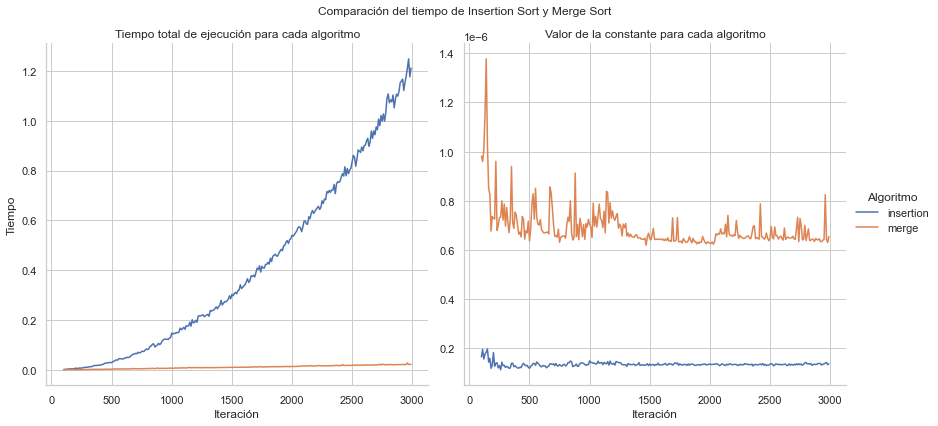

In [374]:
print(df_times3)
plt.figure()

g = sns.set_style("whitegrid")
g = sns.FacetGrid(df_times3[df_times3['iter'] > 100], col="algo2", sharey=False, height=6)
g.fig.suptitle('Comparación del tiempo de Insertion Sort y Merge Sort') # can also get the figure from plt.gcf()
g = g.map(sns.lineplot, "iter", "time_norm", "algo")
g.axes[0,0].set_xlabel('Iteración')
g.axes[0,1].set_xlabel('Iteración')
g.axes[0,0].set_ylabel('Tiempo')
g.axes[0,0].set_title('Tiempo total de ejecución para cada algoritmo')
g.axes[0,1].set_title('Valor de la constante para cada algoritmo')
g.add_legend(title='Algoritmo')
plt.savefig("graphs/total_time.png")


      iter       algo      algo2     time_norm
0        1  insertion       time  2.527237e-05
1       11  insertion       time  4.601479e-05
2       21  insertion       time  8.916855e-05
3       31  insertion       time  3.950596e-04
4       41  insertion       time  3.461838e-04
...    ...        ...        ...           ...
1195  2951      merge  time_norm  6.428429e-07
1196  2961      merge  time_norm  8.242811e-07
1197  2971      merge  time_norm  6.424766e-07
1198  2981      merge  time_norm  6.295471e-07
1199  2991      merge  time_norm  6.540210e-07

[1200 rows x 4 columns]


<ipython-input-375-8be213fb9d29>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g = sns.FacetGrid(df_times3[(df_times3['iter'])> 2][df_times3['iter'] < 100], col="algo2", sharey=False, height=6)


<Figure size 432x288 with 0 Axes>

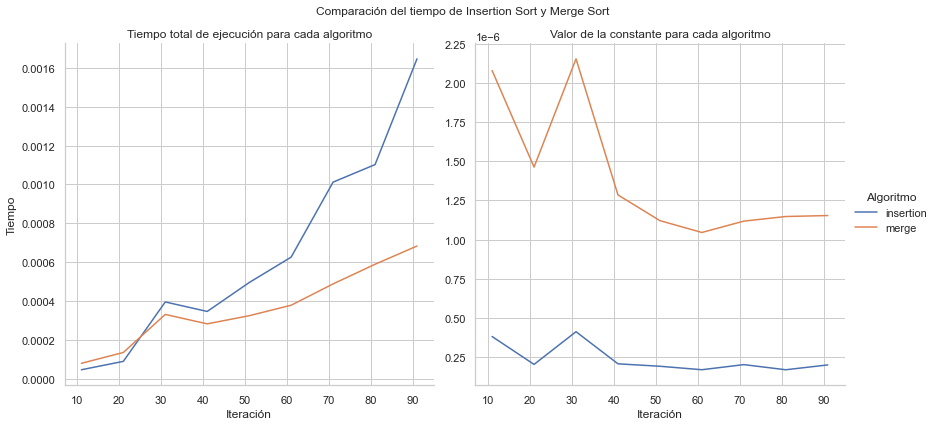

In [375]:
print(df_times3)
plt.figure()

g = sns.set_style("whitegrid")
g = sns.FacetGrid(df_times3[(df_times3['iter'])> 2][df_times3['iter'] < 100], col="algo2", sharey=False, height=6)
g.fig.suptitle('Comparación del tiempo de Insertion Sort y Merge Sort') # can also get the figure from plt.gcf()
g = g.map(sns.lineplot, "iter", "time_norm", "algo")
g.axes[0,0].set_xlabel('Iteración')
g.axes[0,1].set_xlabel('Iteración')
g.axes[0,0].set_ylabel('Tiempo')
g.axes[0,0].set_title('Tiempo total de ejecución para cada algoritmo')
g.axes[0,1].set_title('Valor de la constante para cada algoritmo')
g.add_legend(title='Algoritmo')
plt.savefig("graphs/constant_time.png")